In [7]:
#Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#crypto-markets.csv dosyasından bitcoin datasetini okutarak pandas dataframe oluşturulması
df= pd.read_csv('crypto-markets.csv', parse_dates=['date'], index_col='date')

In [9]:
#Oluşturulan dataframe in ilk 10 satırına göz atma
df.head(10)

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2013-04-28,BTC,135.30,135.98,132.10,134.21,0,1500520000,Bitcoin,1
2013-04-29,BTC,134.44,147.49,134.00,144.54,0,1491160000,Bitcoin,1
2013-04-30,BTC,144.00,146.93,134.05,139.00,0,1597780000,Bitcoin,1
2013-05-01,BTC,139.00,139.89,107.72,116.99,0,1542820000,Bitcoin,1
2013-05-02,BTC,116.38,125.60,92.28,105.21,0,1292190000,Bitcoin,1
2013-05-03,BTC,106.25,108.13,79.10,97.75,0,1180070000,Bitcoin,1
2013-05-04,BTC,98.10,115.00,92.50,112.50,0,1089890000,Bitcoin,1
2013-05-05,BTC,112.90,118.80,107.14,115.91,0,1254760000,Bitcoin,1
2013-05-06,BTC,115.98,124.66,106.64,112.30,0,1289470000,Bitcoin,1


In [10]:
#Son 10 satırına göz atma
df.tail(10)

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2017-12-18,KBR,0.118618,0.146556,0.113298,0.137504,2849,0,Kubera Coin,1366
2017-12-13,IGNIS,2.090000,2.320000,1.940000,2.310000,18762,0,Ignis [Futures],1367
2017-12-14,IGNIS,2.310000,6.900000,2.180000,2.870000,7427,0,Ignis [Futures],1367
2017-12-15,IGNIS,4.230000,5.490000,2.040000,2.450000,1763,0,Ignis [Futures],1367
2017-12-16,IGNIS,2.460000,3.590000,2.050000,2.090000,9242,0,Ignis [Futures],1367
2017-12-17,IGNIS,2.090000,2.380000,2.090000,2.160000,10272,0,Ignis [Futures],1367
2017-12-18,IGNIS,2.160000,2.640000,2.060000,2.540000,3385,0,Ignis [Futures],1367
2017-12-17,BTCA,0.012830,0.014488,0.012793,0.014465,209739,0,Bitair,1368
2017-12-18,BTCA,0.014301,0.017507,0.010392,0.012712,223386,0,Bitair,1368


**Bu verisetinde birden çok kripto para çeşidi mevcut sonraki adımlarda sadece bitcoin verisini içerecek şekilde ayıklama yapılacak**

In [11]:
btc=df[df['symbol']=='BTC'].copy()#df['symbol']=='BTC' yani symbol kolonunun BTC ye eşit olduğu kısımları belirtiyoruz. 
btc.drop(['volume','symbol','name','ranknow','market'],axis=1,inplace=True)#ismi belirtilen kolonları dropluyoruz.Droplanan kolonlar gereksiz

In [12]:
btc.isnull().any()#NA value var mı kontrol için. False NA value yok demek

open     False
high     False
low      False
close    False
dtype: bool

In [13]:
btc.shape #Yeni datamızda kaç satır ve kaç kolon var ona bakıyoruz

(1696, 4)

In [14]:
btc.head()#data hangi tarihten başlıyor ona bakıyoruz

,open,high,low,close
date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21


In [15]:
btc.tail()#Hangi tarihe kadar gidiyor ona bakıyoruz. Çıkan sonuçta 2017ye gittiği görülüyor.  Yani 2013-2017 arası bitcoin verisi var.

,open,high,low,close
date,,,,
2017-12-14,16384.6,17085.8,16185.9,16564.0
2017-12-15,16601.3,18154.1,16601.3,17706.9
2017-12-16,17760.3,19716.7,17515.3,19497.4
2017-12-17,19475.8,20089.0,18974.1,19140.8
2017-12-18,19106.4,19371.0,18355.9,19114.2


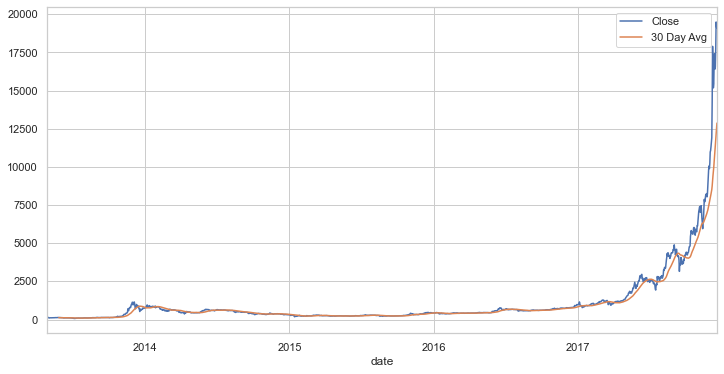

In [16]:
#Seaborn kütüphanesi kullanarak yıllar arasında bitcoinin davranış grafiğini çizdiriyoruz.
sns.set()
sns.set_style('whitegrid')#beyaz ve kareli stil seçimi yapılıyor
btc['close'].plot(figsize=(12,6),label='Close')#Grafiğin size ı 12x6 şeklinde ayarlanıyor.
btc['close'].rolling(window=30).mean().plot(label='30 Day Avg')
#Grafite 30 Day Avg belirtilen çizginin anlamı 30 günlük veri ortalaması. Her 30 günün ortalaması grafiğe aktarılıyor ve yeni bir çizgi çiziliyor.
plt.legend()

In [17]:
#bütün değerlerin ortalaması bir değer ekleniyor. sebebi modelin verimini arttırmak. ohlc_average kolonu olarak veriye eklendi.
btc['ohlc_average'] = (btc['open'].values + btc['high'].values + btc['low'].values + btc['close'].values) / 4

In [18]:
btc.head()

,open,high,low,close,ohlc_average
date,,,,,
2013-04-28,135.30,135.98,132.10,134.21,134.3975
2013-04-29,134.44,147.49,134.00,144.54,140.1175
2013-04-30,144.00,146.93,134.05,139.00,140.9950
2013-05-01,139.00,139.89,107.72,116.99,125.9000
2013-05-02,116.38,125.60,92.28,105.21,109.8675


In [19]:
btc['Price_After_Month']=btc['close'].shift(-30) #Aylık bitcoin verisi tahmini yapılacak bu sebeple price_after_month kolonu oluşturuluyor.
#Bu kolon tahmin edilecek

In [20]:
btc.tail()

,open,high,low,close,ohlc_average,Price_After_Month
date,,,,,,
2017-12-14,16384.6,17085.8,16185.9,16564.0,16555.075,NaN
2017-12-15,16601.3,18154.1,16601.3,17706.9,17265.900,NaN
2017-12-16,17760.3,19716.7,17515.3,19497.4,18622.425,NaN
2017-12-17,19475.8,20089.0,18974.1,19140.8,19419.925,NaN
2017-12-18,19106.4,19371.0,18355.9,19114.2,18986.875,NaN


In [21]:
#X ve y değerleri hazırlanıyor.
from sklearn import preprocessing
btc.dropna(inplace=True)#NA değerler droplanıyor
X=btc.drop('Price_After_Month',axis=1).copy()
X=preprocessing.scale(X)
y=btc['Price_After_Month']

In [22]:
from sklearn.model_selection import train_test_split
#train ve test olarak dataset in ayrılması
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)#%30 test %70 train

In [23]:
#Regresyon modeli kullanılıyor RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)#Modelin oluşturulması
reg.fit(X_train,y_train)#Train dataları modele uygulanıyor
accuracy=reg.score(X_test,y_test)#Modelin accuracy si
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 91.7575 %


In [24]:
preds = reg.predict(X_test)#Test verisine göre tahminde bulunulması
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1]) #test verisinin tahminiyle gerçek değerin kıyası

The prediction is: 607.1487500000002 But the real value is: 607.15


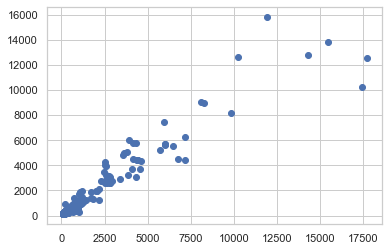

In [30]:
plt.scatter(y_test,preds)
plt.xlabel("")